## Học tensorflow

### Các bước làm một bài toán machinelearning
- Understanding data
- Preprocessing data (remove ouliers, missing data progress, sampling, nomalization)
- Features Engineering
- Selection Aglorithm
- Training
- Fine-turning
- Evaluation
- Deployment

In [1]:
import tensorflow as tf

In [5]:
tf.Session

tensorflow.python.client.session.Session

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import os

In [6]:
housing = pd.read_csv('housing.csv')

In [7]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- xử lý thiếu: total_bedrooms

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
%matplotlib inline

- Sử dụng matplotlib trên jupyter notebook: thêm backend đồ họa vào jupyter

In [11]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f362573c908>,
      dtype=object)

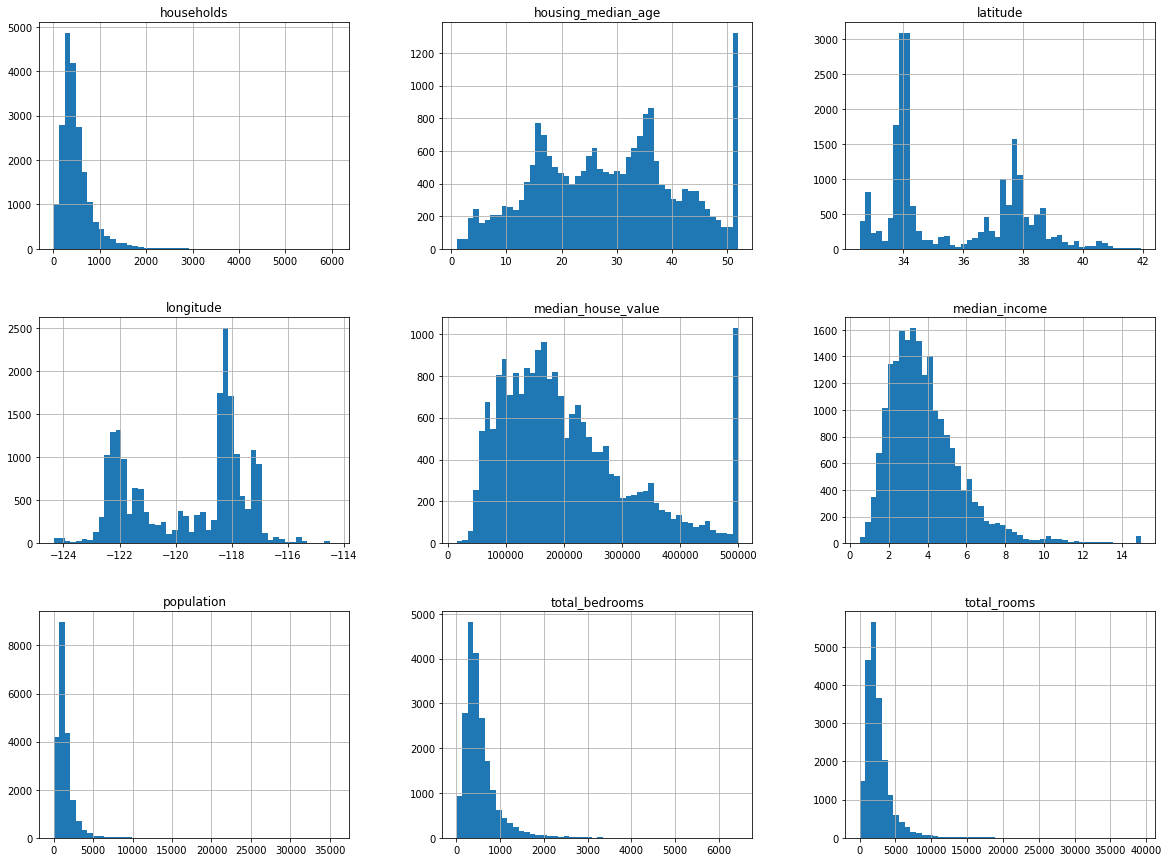

In [12]:
housing.hist(bins=50, figsize=(20,15))

- biểu đồ histogram biểu thị sự phân bố của các phần tử trong tập dữ liệu
- hoặc có thể hiểu là tần số xuất hiện của một phần tử

#### Cần phải làm
- nommarlize long tail
- đưa về 1 scale
- normalize dữ liệu về 1 scale
- thu thập thêm dữ liệu
- cân bằng dữ liệu

### Map californial

![.](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSicc2eerYe6RLgY1rPWhbGonJWloUxGLi67oGgV82pAB47Szhw)

### Vẽ biểu đồ Housing

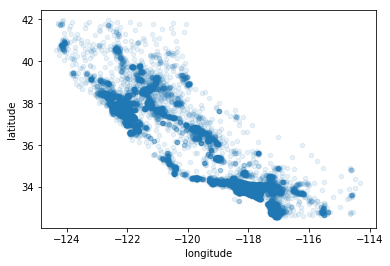

In [13]:
# vẽ biểu đồ nhà ở
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

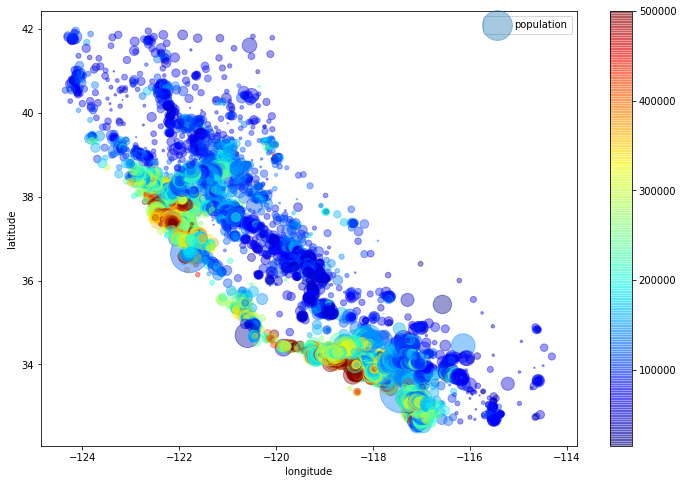

In [14]:
# vẽ biểu đồ nhà ởcó thêm thuộc tính dân số
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4, 
             s=housing['population']/20, label='population', figsize=(12,8), 
             c=housing['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True)

### Trong hàm plot() thì có các thuộc tính sau:
- figsize: kích thước của ô hiển thị (12x8)
- kind: kiểu biểu đồ (scatter: biểu đồ phân tán)
- x: hoành độ 1 điểm
- y: tung độ 1 điểm
- alpha: độ đậm nhạt của điểm trên biểu đồ
- s: thuộc tính sẽ được sử dụng để làm bán kính của 1 điểm
- laber: nhãn chú thích cho thuộc tính được chọn ở s
- c: thuộc tính sẽ được sử dụng để tô màu cho 1 điểm
- cmap=plt.get_cmap('jet'): tạo màu sắc cho các điểm, nếu không có thì màu đen trắng
- colorbar: có hiển thị chú thích cho thuộc tính được tô màu hay không

### Ma trận độ tương quan
- Biểu thị sự phụ thuộc của 1 thuộc tính với các thuộc tính còn lại
- Hàm tính ma trận tương quan corr() có sẵn trong thư viện pandas. Vì housing là đối tượng sinh ra bởi pandas nên có cài đặt thuộc tính đó

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

### Cleaning data
#### Trường hợp thiết dữ liệu: thuộc tính total_bedroom, có các cách xử lý:
- xóa luôn thuộc tính total_bedroom
- thêm các chỗ thiết bằng trung bình, trung vị của total_bedroom khác


In [17]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace = True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Combination features
#### Thiếu thuộc tính: trong dữ liệu trên, total_bedroom là của toàn quận chứ không phải của 1 nhà, xử lý:
- tạo 1 thuộc tính mới total_bedroom_perhold là bằng total_bedroom/household
- tương tự với total_rooms, population



In [18]:
housing['room_per_household'] = housing['total_rooms']/housing['households']
housing['bed_room_per_household'] = housing['total_bedrooms']/housing['households']
housing['population_per_household'] = housing['population']/housing['households']

In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values()

latitude                   -0.144160
longitude                  -0.045967
bed_room_per_household     -0.045637
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049457
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
room_per_household          0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

### Text to categories
#### Với nhưng các thuộc tính kiểu text như: giới tính (nam, nữ), xử lý:
- mã hóa thành dạng onehot
- trong pandas có hỗ trợ chuyển đổi bằng hàm get_dummies()

In [20]:
housing_dummies = pd.get_dummies(housing, prefix = ['ocean_proximity'])
housing_dummies.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bed_room_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.02381,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.97188,2.109842,0,0,0,1,0


## Scaling data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
housing_features = housing_dummies.drop('median_house_value', axis = 1)
X_data = scaler.fit_transform(housing_features)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f361939c2e8>,
      dtype=object)

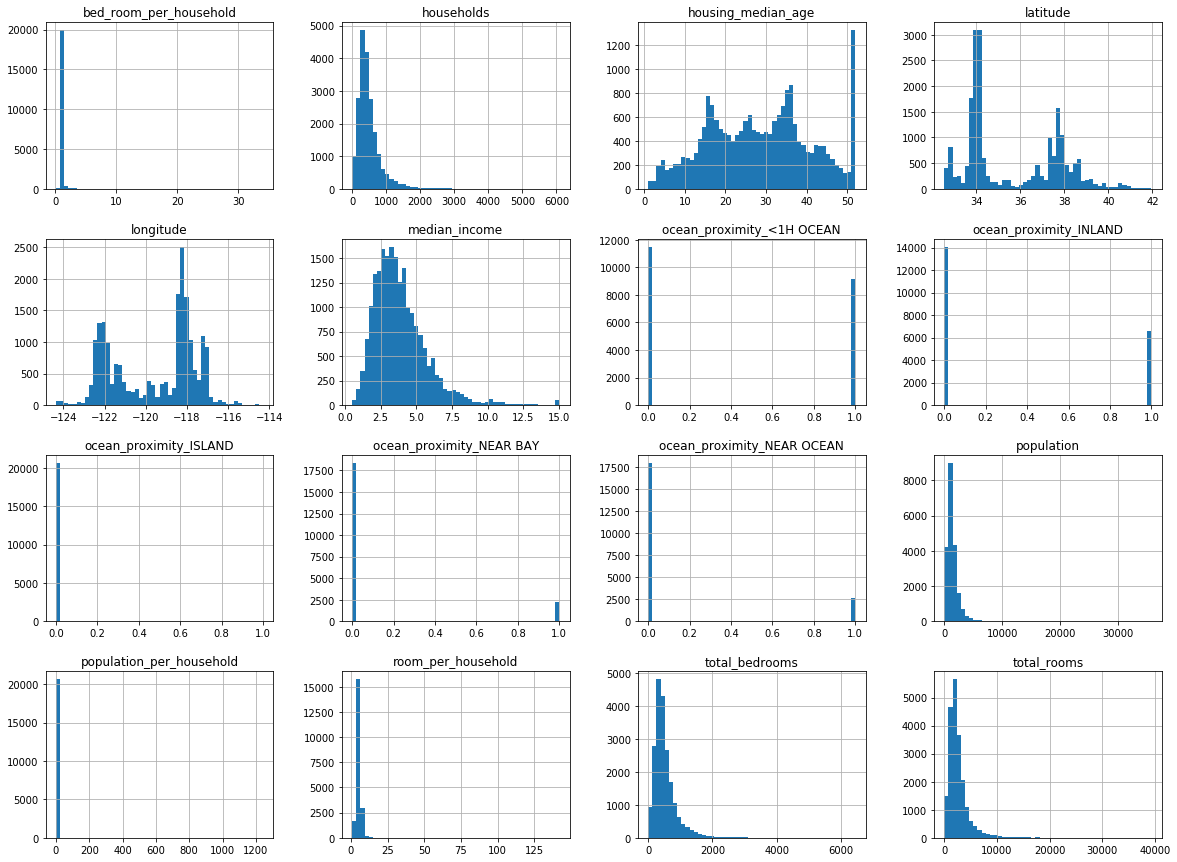

In [22]:
X = pd.DataFrame(X_data, columns=housing_features.columns)
housing_features.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36190c70b8>,
      dtype=object)

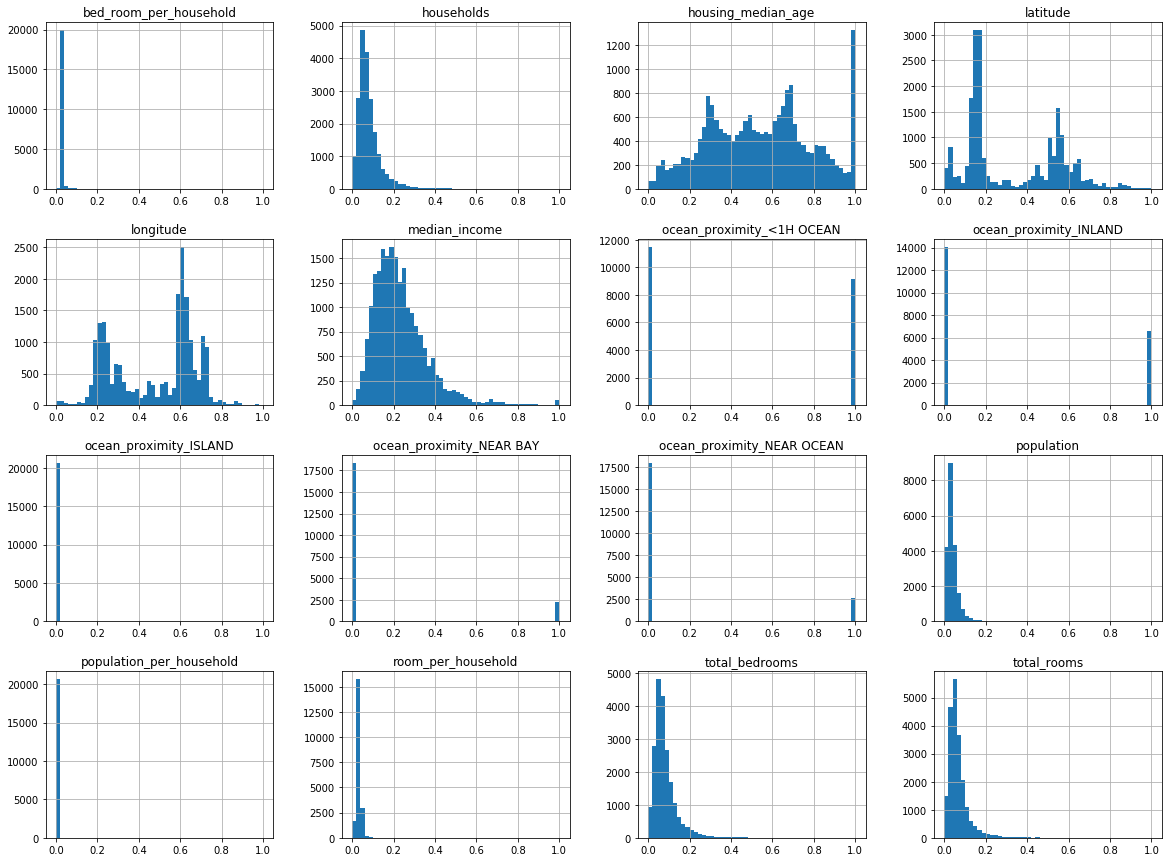

In [23]:
X.hist(bins=50, figsize=(20,15))

- Hàm MinMaxScaler.fit_tranform(housing_features)
    - Thực hiện: đưa phạm vi của các thuộc tính trong housing_features về khoảng [0,1]
    - Giá trị trả về: 1 matrix chữa các thuộc tính đã được biến đổi
    - Nếu muốn chuyển matrix về dataframe thì dùng hàm Pandas.DataFrame()
        ```
        housingDataFrame = Pandas.DataFrame(Matrix, columns = housing.columns)
        ```

In [24]:
Y_data = np.array(housing_dummies['median_house_value'])
Y_data = Y_data.reshape(Y_data.shape[0],1)
Y_data.shape

(20640, 1)

In [25]:
Y_data[0]

array([452600.])

- Tạo X_data và Y_data để train cho mô hình

### Train test split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data,Y_data, test_size =  0.2, random_state = 42)

In [27]:
x_train.shape

(16512, 16)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_predict = model.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error
def rmse_error(y_pred,y_test):
    mse_error=mean_squared_error(y_pred,y_test)
    return np.sqrt(mse_error)

In [31]:
rmse_error(y_predict, y_test)

73398.92741071901

## Training tensorflow

In [32]:
n_dim = x_train.shape[1]
n_dim

16

In [33]:
# place holder for pass data
x = tf.placeholder(tf.float32, [None,n_dim])
y = tf.placeholder(tf.float32, [None, 1])

In [34]:
# train weight
w = tf.Variable(tf.ones([n_dim,1]))
b = tf.Variable(np.random.randn(), dtype=tf.float32)

In [35]:
pred = tf.add(tf.matmul(x,w),b)

In [36]:
loss = tf.sqrt(tf.reduce_mean(tf.square(pred-y)))

In [44]:
learning_rate =2000
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [38]:
init = tf.global_variables_initializer()
sess = tf.Session()

In [45]:
sess.run(init)

In [46]:
epochs = 100000
for epoch in range(epochs):
    sess.run(optimizer, feed_dict={x:x_train,y:y_train})
    
    test_loss = sess.run(loss,feed_dict={x:x_test,y:y_test})
    
    if epoch%10000 == 0:
        print("Epoch= {} Test loss= {}".format(epoch,test_loss))

Epoch= 0 Test loss= 232073.515625
Epoch= 10000 Test loss= 72791.921875
Epoch= 20000 Test loss= 72336.5859375
Epoch= 30000 Test loss= 71970.671875
Epoch= 40000 Test loss= 71683.8984375
Epoch= 50000 Test loss= 71454.7578125
Epoch= 60000 Test loss= 71269.6875
Epoch= 70000 Test loss= 71118.2265625
Epoch= 80000 Test loss= 70993.2890625
Epoch= 90000 Test loss= 70889.59375
